# Advancing Landslide Risk Management: Integrating Prediction Models and Remote Sensing Data

<img src="https://d9-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/thumbnails/image/BigSur1_May20SlideDES_0.jpg" width=800 height=600 />
USGS air photo of the Mud Creek landslide, taken on May 27, 2017

Introducing a dual model system to predict and locate landslides could significantly enhance our ability to manage their impacts. By integrating predictive modeling techniques with real-time monitoring systems, this approach offers both proactive and reactive capabilities. The predictive model, a modified Antecedent Water Index model, which we call A*, employs extreme values of modeled soil water to anticipate landslide-inducing rainfall, enhancing prediction accuracy. Once A* has determined where landslides are predicted we can then utilize NASA's OPREA Land Surface Disturbance Alert model to  detect and pinpoint landslide occurrences in near real-time. This dual model system has the potential to greatly improve landslide risk management strategies and contribute to community safety and resilience. 

Here's an overview of how the data is processed in this system:

1. **Predictive Model**: We use a method to forecast potential landslides by analyzing soil moisture levels and rainfall patterns. Think of it like a sophisticated weather forecast that tells us when and where landslides might happen.

2. **Real-Time Monitoring**: We have a system in place that constantly watches for signs of landslides using various sources of information. This allows us to quickly identify and respond to any landslides as they occur.

3. **Vegetation and Land Changes**: We also monitor changes in the land and vegetation using high-resolution satellite images from the Landsat and Sentinel-2 satellites. These images help us spot disturbances in the environment, which can be early warning signs of landslides.

4. **Data Integration**: By combining predictions, real-time monitoring, and satellite data, we create a comprehensive view of landslide risks. This integrated approach allows us to take both preventive measures and immediate actions when needed.

5. **Proof of Concept and Automation**: We are testing this system with data from 2023-2024 to prove its effectiveness. The goal is to automate these processes for future use, making it easier to manage landslide risks continuously.

This system aims to provide timely warnings, improve response strategies, and ultimately enhance the safety and resilience of communities vulnerable to landslides.


Perkins, J. P., Oakley, N. S., Collins, B. D., Corbett, S. C., and Burgess, W. P.: Characterizing the scale of regional landslide triggering from storm hydrometeorology, EGUsphere [preprint], https://doi.org/10.5194/egusphere-2024-873, 2024.

OPERA Land Surface Disturbance Alert from Harmonized Landsat Sentinel-2 product V001 – OPERA_L3_DIST-ALERT-HLS_V1 Hansen, M.. OPERA Land Surface Disturbance Alert from Harmonized Landsat Sentinel-2 product (Version 1). 2024, distributed by NASA EOSDIS Land Processes Distributed Active Archive Center, https://doi.org/10.5067/SNWG/OPERA_L3_DIST-ALERT-HLS_V1.001.

### Below is a flow chart exhiting the rought idea of how the workflow should progress: 
________________________________________________________________________________________
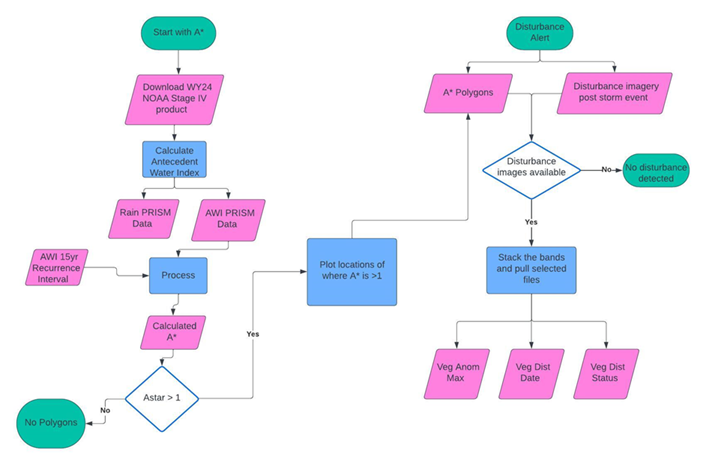

# A* Methodology 

The prediction model, A*—modified from the Antecedent Water Index model, employs extreme values of modeled soil water relative to local climatology as a proxy for landslide-inducing rainfall. This type of model falls within the category of reduced-complexity soil hydrologic models, commonly referred to as 'leaky barrel' or 'tank' models, where rainfall rapidly enters the model reservoir and drains proportionally to reservoir height. A regional landslide-triggering proxy is then calibrated based on anomalous values of theoretical soil water, leveraging the Antecedent Water Index by Godt et al. (2006) and research by Wilson and Wieczorek (1995), termed A*. This refined approach enhances landslide prediction by considering deviations in soil moisture levels.

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import numpy as np
import xarray as xr
import pygmt

# Define the project root directory using the current working directory
project_root = os.getcwd()

# Add the 'EA_FinalProj' directory to the Python path using a relative path
sys.path.append(os.path.join(project_root, 'EA_FinalProj'))

# Now you can import the RainfallProcessor class and other functions
from modules.RainfallProcessor import RainfallProcessor
from modules.download_unzip import download_and_unzip_qpe
from modules.figure_and_boundingboxes import fig_boundingboxes



In [3]:
# User inputs for the year and water year (WY)
year = input("Enter the year of the rain data for download (e.g., 2023): ")
month = input("Enter the month of the rain data for download (e.g., 10): ")
WY = input("Enter the water year (e.g., 2023): ")

# Convert inputs to integers for processing
year = int(year)
month = int(month)
WY = str(WY)

# Download the month and year netCDF grids - QPE (6-Hour Observed Precipitation)
# This function fetches and unzips the QPE data for October of the specified year
download_and_unzip_qpe(year, month, WY)

# Define paths relative to the project root, incorporating the year and WY
latlon_csv_path = os.path.join(project_root, 'astar_needed_DoNotTouch', 'QPE_latlons_new.csv')
output_dir = os.path.join(project_root, f'wy{WY}_astar', 'processing_results')
nc_files_path = os.path.join(project_root, f'wy{WY}_astar', 'wy_data', '*.nc')

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Instantiate and use the RainfallProcessor class
processor = RainfallProcessor(
    latlon_csv_path=latlon_csv_path,
    crs_proj4='+proj=stere +lat_0=90 +lat_ts=60 +lon_0=-105 +k=1 +x_0=2202656.25 +y_0=6515100 +a=6371200 +b=6371200 +to_meter=4762.5 +no_defs',
    output_dir=output_dir
)

# Process the netCDF files in the specified directory and geographical bounds for the given year and water year
rainPrism, AWI_prism = processor.process_dir_CNRFC_AWI_WY(
    filepath=nc_files_path,
    min_lon=-125,
    max_lon=-113,
    min_lat=32,
    max_lat=43,
    year=year,
    WY=WY
)

# Define the output file paths
outfile1 = os.path.join(output_dir, f'rain_prism_{year}.nc')
outfile2 = os.path.join(output_dir, f'AWI_prism_{WY}.nc')

# If the files already exist, delete them or handle as needed
if os.path.exists(outfile1):
    os.remove(outfile1)
if os.path.exists(outfile2):
    os.remove(outfile2)

# Save the data to netCDF files
rainPrism.to_netcdf(outfile1, mode='w')  # 'w' for write mode
AWI_prism.to_netcdf(outfile2, mode='w')

print("Files successfully saved.")


Enter the year of the rain data for download (e.g., 2023):  2023
Enter the month of the rain data for download (e.g., 10):  01
Enter the water year (e.g., 2023):  2023


Processing C:\Users\skcor\Github\EA_FinalProj\wy2023_astar\wy_data\qpe.20230430_1200.nc
Files exported
The file C:\Users\skcor\Github\EA_FinalProj\wy2023_astar\processing_results\AWI_prism_2023.nc contains 838 time steps.
Files successfully saved.


In [4]:
# Set the field capacity value
field_capacity = 0.18

# Define the path to the processed AWI data file using the year and WY
awi_data_path = os.path.join(project_root, f'wy{WY}_astar', 'processing_results', f'AWI_prism_{WY}.nc')

# Open the processed AWI data file
a_prime = xr.open_dataset(awi_data_path)

# Calculate the size of the 'time' dimension
p1 = np.size(a_prime['time']) - 1

# Fill any NaN values with 0
a_prime = a_prime.fillna(0)

# Convert the dataset to a data array by selecting the specific variable
a_prime = a_prime['__xarray_dataarray_variable__']

# Rename the variable to 'AWI'
a_prime = a_prime.rename('AWI')

# Slice the data array to include all dimensions and the corrected time dimension
a_prime = a_prime[:, :, 0:p1]

# Add the field capacity value to all elements in the data array
a_prime += field_capacity


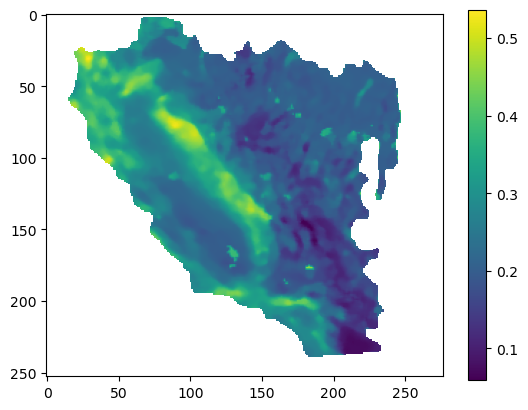

In [5]:

# Define the path to the AWI 15-yr recurrence grid netCDF file
awi_15yr_path = os.path.join(project_root, 'astar_needed_DoNotTouch', 'AWI_15yr_evd_smooth.nc')

# Import AWI 15-yr recurrence grid
# Open the netCDF file containing AWI 15-year recurrence grid data
awi_15yr = xr.open_dataset(awi_15yr_path)

# Convert the dataset to a data array by selecting the variable of interest ('tp')
awi_15yr = awi_15yr['tp']

# Note: because of the projection shift in the NOAA precipitation data after Sep. 2020, the grid sizes are 
# different between the WY23 data and the 15-year Astar data. So, we need to interpolate the AWI 15-yr grid data to the 
# other grid.
# Interpolate the AWI 15-yr grid data to match the other grid
awi_15yr = awi_15yr.interp_like(a_prime[1, :, :])

# Visualize the interpolated AWI 15-yr data
plt.imshow(awi_15yr)
plt.colorbar()
plt.show()


Enter the storm beginning date (e.g., 2023-01-01):  2023-01-01
Enter the storm ending date (e.g., 2023-03-30):  2023-02-15


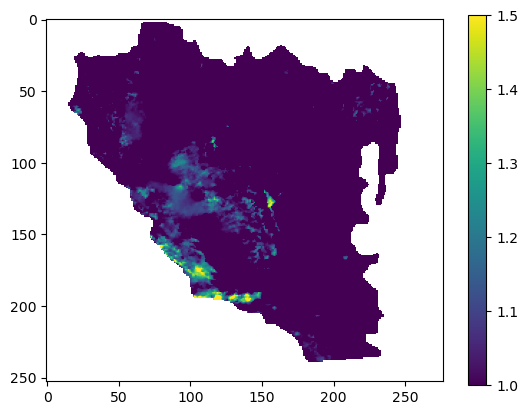

In [6]:
# Prompt user for the storm beginning and ending dates
storm_begin = input("Enter the storm beginning date (e.g., 2023-01-01): ")
storm_end = input("Enter the storm ending date (e.g., 2023-03-30): ")

# Calculate Astar for the chosen Water Year by dividing WY AWI by the 15-yr Astar values
astar = a_prime / awi_15yr

# Convert user input dates to numpy datetime64
beginning_date = np.datetime64(storm_begin)
end_date = np.datetime64(storm_end)

# Extract the time values from the dataset
time_values = astar['time'].values

# Use boolean indexing to select the desired date range
time_mask = (time_values >= beginning_date) & (time_values <= end_date)
storm_event = astar.isel(z=np.where(time_mask)[0])

# Calculate maximum value over the storm window
astar_storm_max = storm_event.max(dim='z')

# Do a basic plot just to see
plt.imshow(astar_storm_max, vmin=1.0, vmax=1.5)
plt.colorbar()
plt.show()


Enter the x-coordinate (column index) of the point to highlight (e.g., 125):  125
Enter the y-coordinate (row index) of the point to highlight (e.g., 195):  195


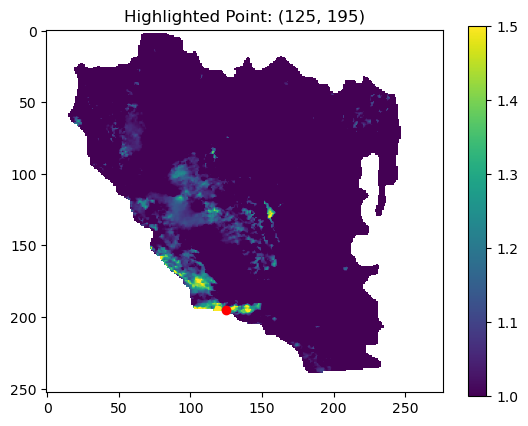

In [7]:
# Visualize the maximum Astar values over the storm window using a heatmap.
# The heatmap color scale is set from 1.0 to 1.5, and a colorbar is added for reference.
plt.imshow(astar_storm_max, vmin=1.0, vmax=1.5)
plt.colorbar()

# Prompt the user to enter the coordinates for the grid point to be highlighted
xcoord = int(input("Enter the x-coordinate (column index) of the point to highlight (e.g., 125): "))
ycoord = int(input("Enter the y-coordinate (row index) of the point to highlight (e.g., 195): "))

# Highlight the specified grid point at the chosen coordinates with a red circle ('ro').
plt.plot(xcoord, ycoord, 'ro')
plt.title(f'Highlighted Point: ({xcoord}, {ycoord})')
plt.show()


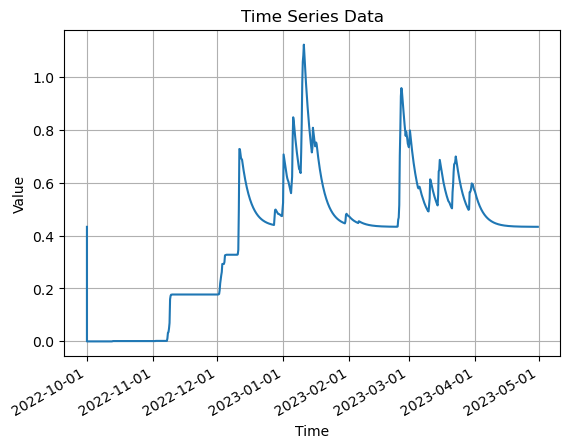

In [8]:
# Display rain data for the specified loctation

# Convert time coordinates to pandas DatetimeIndex
# This makes it easier to handle time data and plot it on the x-axis.
time_coords = pd.to_datetime(astar['time'].values)

# Plot the data
# This plots the time series data for the specified pixel located at (ycoord, xcoord).
plt.plot(time_coords, astar[:, ycoord, xcoord])

# Format the x-axis to show dates nicely
# This sets the x-axis to use dates and formats them for better readability.
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Formatting the plot for better readability
# These lines add labels to the axes, set the title, enable the grid, and rotate date labels.
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.grid(True)
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()  # Display the plot


In [9]:
# Setting shading parameters
azi = ["315/45"] # shading angles
nor = ["t1"] # shading normalization

# Downloading earth relief data
# Load earth relief data with 15-second resolution for the specified region
grid = pygmt.datasets.load_earth_relief(resolution="15s", region=[-125, -115, 32, 42.5])

# Calculating shaded relief
# Compute shaded relief for the grid using the specified shading parameters
shade = pygmt.grdgradient(grid=grid, azimuth=azi, normalize=nor) # calculate shaded relief

# Note: You can find more information on pygmt.org. Here's an example: 
# https://www.pygmt.org/latest/get_started/02_contour_map.html


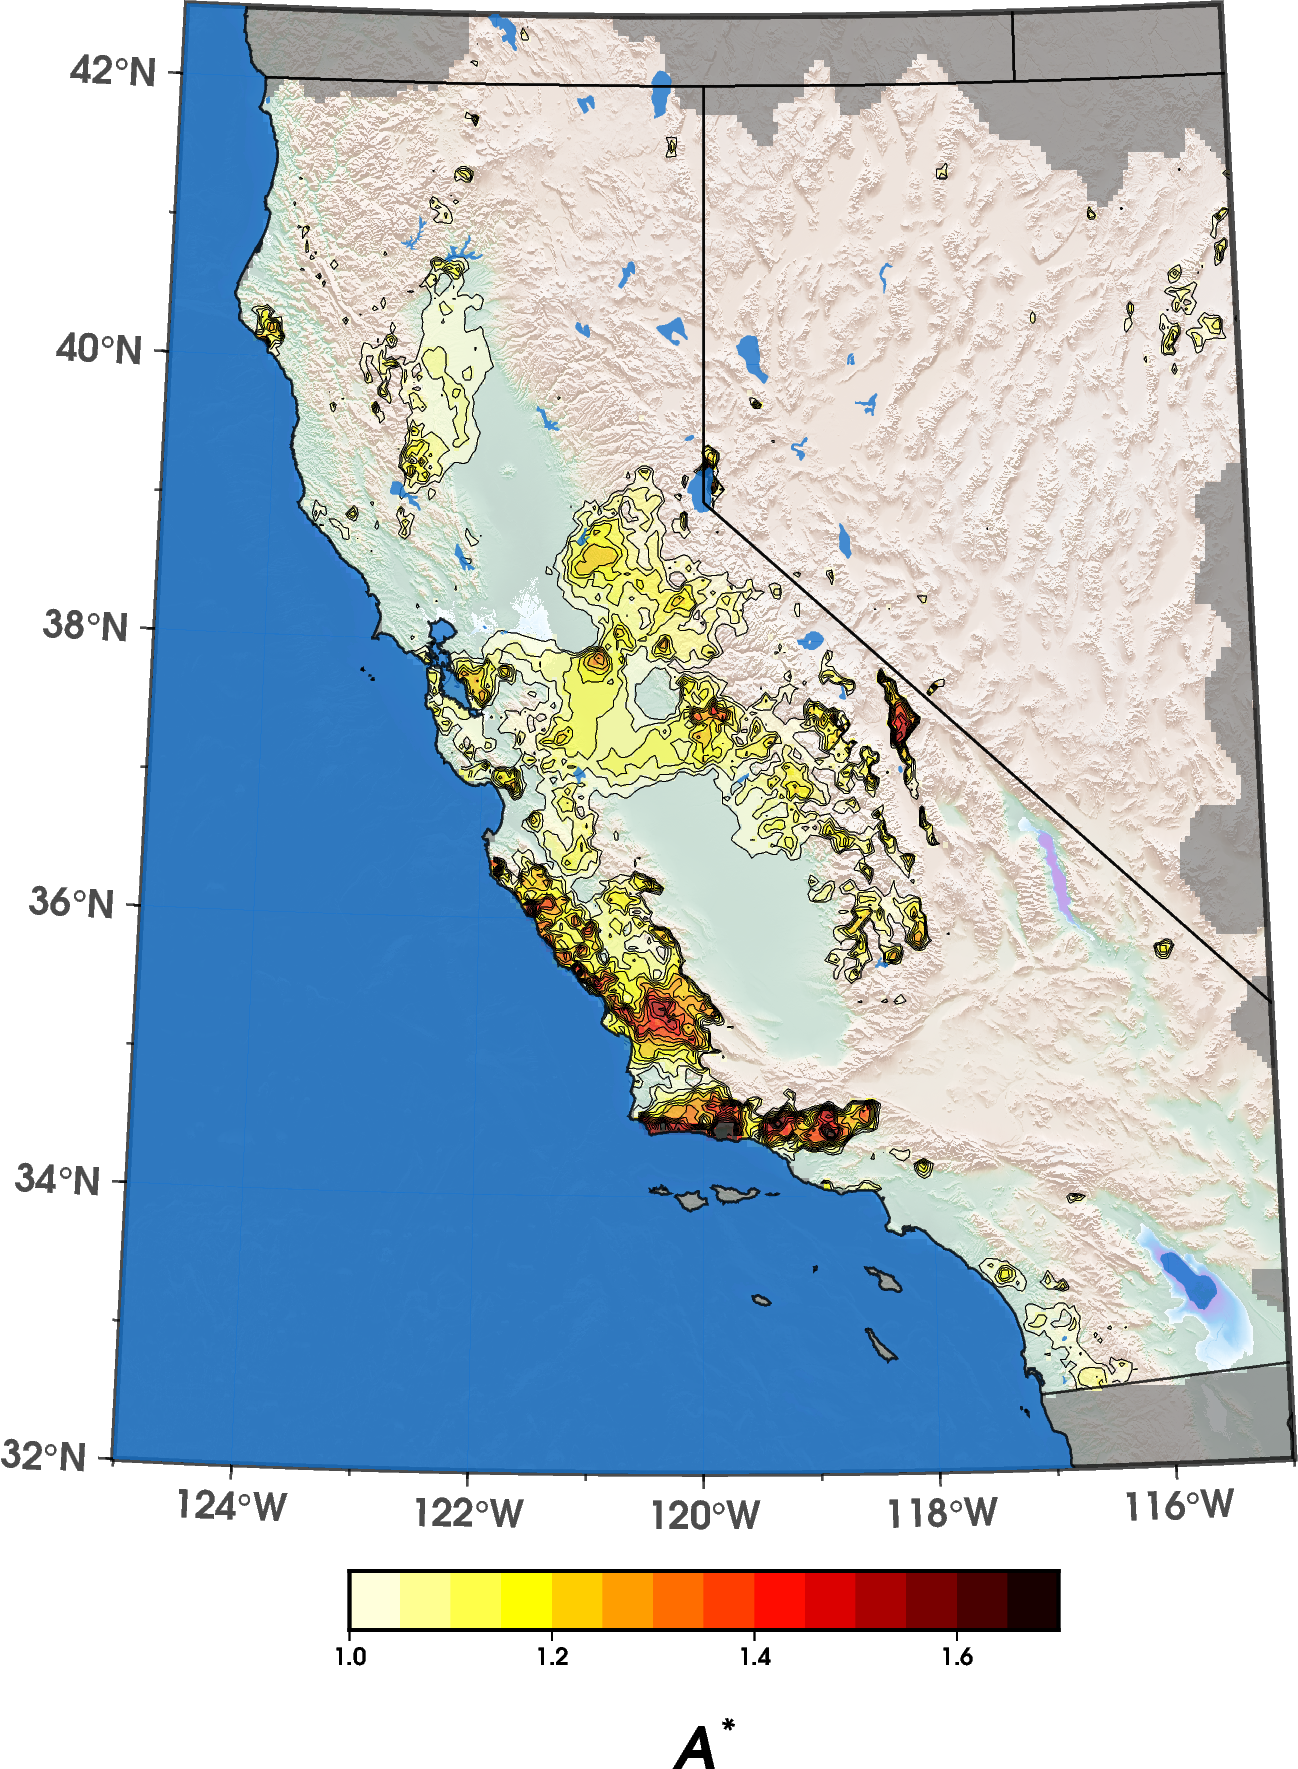

In [10]:
# Initialize the Figure
fig = pygmt.Figure()

# Define a colormap for topography using the 'terra' colormap with elevation range from -100 to 4000 meters
terra = pygmt.makecpt(cmap="terra", series=[-100, 4000])

# Configure the figure's appearance settings
pygmt.config(FONT_TITLE="10p,5", MAP_TITLE_OFFSET="1p", MAP_FRAME_TYPE="plain")
font = "10p,AvantGarde-Demi,black"  # Font configuration for text elements
pygmt.config(FONT="AvantGarde-Demi")  # Set the global font to 'AvantGarde-Demi'

# Generate a color palette table (CPT) for the base map using the 'terra' colormap
pygmt.makecpt(cmap="terra", series=[-100, 4000])
# Plot the topographic grid with shading, using a custom projection and 60% transparency
fig.grdimage(grid=grid, shading=shade,
             projection="L-120/37/32/39/10c",
             cmap=True,
             transparency=60,
            )

# Define the colormap for the 'astar_storm_max' data using the 'matlab/hot' colormap, reversed
minc = 1.0  # Minimum color scale value
maxc = 1.7  # Maximum color scale value
dc = 0.05  # Color scale increment
pygmt.makecpt(cmap="matlab/hot", reverse=True, series=[minc, maxc, dc])

# Overlay the 'astar_storm_max' data on the topographic base map with 30% transparency
fig.grdimage(grid=astar_storm_max,
             projection="L-120/37/32/39/10c",
             cmap=True,
             frame=True,
             nan_transparent="+z0",  # Make zero values transparent
             transparency=30,
            )

# Add contour lines to the 'astar_storm_max' data at intervals of 0.05, from 1.0 to 1.7
fig.grdcontour(
    levels=np.arange(minc, maxc+dc, dc),
    grid=astar_storm_max,
    limit=[minc, maxc],
    pen="0.1p,black"
)

# Add coastlines, borders, and water bodies with specified styles and 20% transparency for water
fig.coast(shorelines=["1/0.5p,black"], borders=["1/0.5p,black", "2/0.5p,black"], water="dodgerblue3", transparency=20)

# Add a colorbar to the bottom center of the map, with a width of 6 cm and a height of 0.5 cm
fig.colorbar(frame=["a"], position="JBC+/1.0c+w6c/0.5c")

# Add a text annotation ("A@+*") to the center bottom of the map
fig.text(text="A@+*", position="CB", offset="0c/-2.5c", font="14p,AvantGarde-DemiOblique,black", no_clip=True)

# Display the figure
fig.show()

# Save the figure as a PNG file in the portable processing_results folder
output_file = os.path.join(output_dir, f'Astar_Results_{WY}.png')
fig.savefig(output_file, dpi=300)

Polygons saved to C:\Users\skcor\Github\EA_FinalProj\wy2023_astar\processing_results\polygons.geojson
Bounding boxes saved to C:\Users\skcor\Github\EA_FinalProj\wy2023_astar\processing_results\bounding_boxes.geojson
Bounding box coordinates saved to C:\Users\skcor\Github\EA_FinalProj\wy2023_astar\processing_results\bounding_box_coords.csv


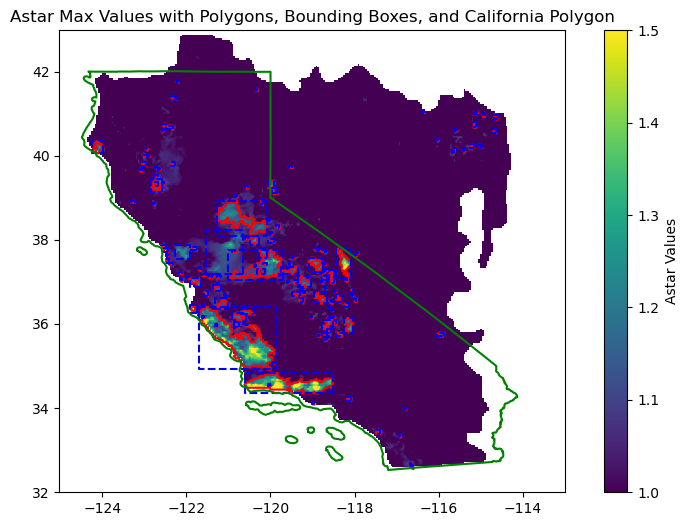

Preview map saved at: C:\Users\skcor\Github\EA_FinalProj\wy2023_astar\processing_results\bounding_boxes_preview.png
        min_lon    min_lat     max_lon    max_lat
0   -121.704682  34.918007 -119.874127  36.399885
1   -120.615066  34.351407 -118.523003  34.830838
2   -121.268836  38.099686 -120.092050  38.927795
3   -121.007328  37.053655 -119.699789  37.751009
4   -121.530344  37.184409 -120.658651  38.230440
..          ...        ...         ...        ...
149 -120.397143  37.358747 -120.353558  37.402332
150 -120.876574  35.876869 -120.832989  35.920454
151 -121.399590  37.140824 -121.356005  37.184409
152 -115.602832  40.584011 -115.559247  40.627596
153 -120.527897  38.056102 -120.484312  38.099686

[154 rows x 4 columns]


In [11]:
# Sets the threshold value for identifying significant data points
threshold = 1.1

# Define the portable output directory and create it if it doesn't exist
output_dir = os.path.join(project_root, f'wy{WY}_astar', 'processing_results')
os.makedirs(output_dir, exist_ok=True)

# Provides the path to the shapefile containing the boundaries of the state of California
california_shapefile = os.path.join(project_root, 'astar_needed_DoNotTouch', 'ca_state', 'CA_State.shp')

# Generating bounding boxes for the figure
# Calls the fig_boundingboxes function to generate bounding boxes using the specified parameters
fig_boundingboxes(astar, beginning_date, end_date, threshold, output_dir, california_shapefile)
